# ETH 파이썬 코드

In [7]:
pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import h5py
import os

def pitchyaw_to_vector(pitchyaws):
    r"""Convert given yaw (:math:`\theta`) and pitch (:math:`\phi`) angles to unit gaze vectors.

    Args:
        pitchyaws (:obj:`numpy.array`): yaw and pitch angles :math:`(n\times 2)` in radians.

    Returns:
        :obj:`numpy.array` of shape :math:`(n\times 3)` with 3D vectors per row.
    """
    n = pitchyaws.shape[0]
    sin = np.sin(pitchyaws)
    cos = np.cos(pitchyaws)
    out = np.empty((n, 3))
    out[:, 0] = np.multiply(cos[:, 0], sin[:, 1])
    out[:, 1] = sin[:, 0]
    out[:, 2] = np.multiply(cos[:, 0], cos[:, 1])
    return out

def draw_gaze(image_in, pitchyaw, thickness=2, color=(0, 0, 255)):
    """Draw gaze angle on given image with a given eye positions."""
    image_out = image_in
    (h, w) = image_in.shape[:2]
    length = w / 2.0
    pos = (int(h / 2.0), int(w / 2.0))
    if len(image_out.shape) == 2 or image_out.shape[2] == 1:
        image_out = cv2.cvtColor(image_out, cv2.COLOR_GRAY2BGR)
    dx = -length * np.sin(pitchyaw[1]) * np.cos(pitchyaw[0])
    dy = -length * np.sin(pitchyaw[0])
    cv2.arrowedLine(image_out, tuple(np.round(pos).astype(np.int32)),
                   tuple(np.round([pos[0] + dx, pos[1] + dy]).astype(int)), color,
                   thickness, cv2.LINE_AA, tipLength=0.2)
    return image_out

if __name__ == '__main__':
    sub_id = 0   # subject id number you would like to see
    input_file = 'nsmount/ETH_Xgaze/xgaze_448/train/subject' + str(sub_id).zfill(4) + '.h5'

    fid = h5py.File(input_file, 'r')
    img_size = 250
    num_data = fid["face_patch"].shape[0]   # get the total number of samples inside the h5 file
    print('num_data: ', num_data)

    img_show = np.zeros((img_size*3, img_size*6, 3), dtype=np.uint8)  # initial a empty image

    cv2.namedWindow("image")
    gaze = []
    
    num_i = 0
    while True:
        for num_r in range(0, 3):   # we show them in 3 rows
            for num_c in range(0, 6):   # we show them in 6 columns
                face_patch = fid['face_patch'][num_i, :] # the face patch
                if 'face_gaze' in fid.keys():
                    gaze = fid['face_gaze'][num_i, :]   # the normalized gaze direction with size of 2 dimensions as horizontal and vertical gaze directions.
                frame_index = fid['frame_index'][num_i, 0]  # the frame index
                cam_index = fid['cam_index'][num_i, 0]   # the camera index
                face_mat_norm = fid['face_mat_norm'][num_i, 0]   # the rotation matrix during data normalization
                face_head_pose = fid['face_head_pose'][num_i, 0]  # the normalized head pose with size of 2 dimensions horizontal and vertical head rotations.

                face_patch = cv2.resize(face_patch, (img_size, img_size))
                # if frame_index > 524:  # if the image is captured under low lighting conditions, we do histogram equalization
                #     img_yuv = cv2.cvtColor(face_patch, cv2.COLOR_BGR2YUV)
                #     img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
                #     face_patch = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

                if 'face_gaze' in fid.keys():
                    face_patch = draw_gaze(face_patch, gaze)  # draw gaze direction on the face patch image

                img_show[img_size*num_r:img_size*(num_r+1), img_size*num_c:img_size*(num_c+1)] = face_patch
                num_i = num_i + 1
                if num_i >= num_data:
                    break

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_show, 'Please press J to the previous sample, L to the next sample, and ESC to exit', (10, 30),
                    font, 1.0, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('image', img_show)
        input_key = cv2.waitKey(0)
        if input_key == 27:  # ESC key to exit
            break
        elif input_key == 106:  # j key to previous
            num_i = num_i - 18*2
            if num_i < 0:
                num_i = 0
        elif input_key == 108:  # l key to the next
            num_i = num_i + 18
        else:
            continue

    cv2.destroyAllWindows()
    fid.close()

num_data:  10098


QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to target thread (0x55e4d63d8380)

QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to target thread (0x55e4d63d8380)

QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to target thread (0x55e4d63d8380)

QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to target thread (0x55e4d63d8380)

QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to target thread (0x55e4d63d8380)

QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to target thread (0x55e4d63d8380)

QObject::moveToThread: Current thread (0x55e4d63d8380) is not the object's thread (0x55e4d6503e20).
Cannot move to tar

# 데이터 확인

In [4]:
import pandas as pd

In [1]:
img_path  = os.path.join("nsmount","ETH_Xgaze","data","RGB","rawdata","test","subject0001")
label_path = os.path.join("nsmount","ETH_Xgaze","data","RGB","labeldata","test","test.label")


In [31]:
with open(label_path, 'r') as file:
    data = file.read()
    
    print(data)

In [ ]:
column = ['face', 'head_x', 'head_y', 'origin', 'cam_index', 'frame_index', 'normmat']
value_list1 = []

with open(label_path, 'r') as file:
    texts = file.readlines()
    for line in texts[1:]:
        face, head, origin, cam_index, frame_index, normmat = line.split(' ')
        #print(head)
        head_x, head_y = head.split(',')
        #print(head_x)
        #print(head_y)
        value = (face, head_x, head_y, origin, cam_index, frame_index, normmat)
        value_list1.append(value)
        
df = pd.DataFrame(value_list1, columns = column)

In [32]:
df

,face,head_x,head_y,origin,cam_index,frame_index,normmat
0,subject0001\1.jpg,-0.05700608669598768,0.16290071604770845,subject0001\0.jpg,1,1,"0.9973773731470934,0.07149363365279554,-0.0112..."
1,subject0001\2.jpg,-0.06439010798796066,-0.12207763820905623,subject0001\1.jpg,2,1,"0.9993869329611744,0.028643247631488355,-0.020..."
2,subject0001\3.jpg,-0.04528985449762736,-0.5740801192332696,subject0001\2.jpg,3,1,"0.9982916195209645,-0.026580454014658365,-0.05..."
3,subject0001\4.jpg,0.28619553518411206,-0.509971702710763,subject0001\3.jpg,4,1,"0.9798176993725491,0.1992663415872298,-0.01581..."
4,subject0001\5.jpg,0.5185191956403891,-0.0770646451710429,subject0001\4.jpg,5,1,"0.9984626209426412,0.05393878185075123,-0.0127..."
...,...,...,...,...,...,...,...
159781,subject0118\159782.jpg,1.2462712402726128,0.022187931403708443,subject0118\11011.jpg,14,614,"0.9816821377650515,-0.18946706233486474,0.0200..."
159782,subject0118\159783.jpg,1.3453414644857677,0.5085693643495712,subject0118\11012.jpg,15,614,"0.7439885227875038,-0.6681528518488364,0.00726..."
159783,subject0118\159784.jpg,0.6108757119491601,1.2285761435457694,subject0118\11013.jpg,16,614,"0.9640349872551098,-0.25636848391222683,0.0700..."
159784,subject0118\159785.jpg,-0.27581108747793043,0.5062312732533283,subject0118\11014.jpg,17,614,"0.9357237762188436,0.34476689890752577,0.07454..."


In [42]:
df1 = df['head_x']

In [43]:
df2 = df['head_y']

In [50]:
# 데이터를 total_label_data DataFrame에 연결
total_label_data = pd.concat([df1, df2], axis=1)

In [53]:
total_label_data = total_label_data.astype(float)

In [65]:
# Convert radians to degrees
total_label_data['head_x'] = np.degrees(total_label_data['head_x'])
total_label_data['head_y'] = np.degrees(total_label_data['head_y'])

In [66]:
total_label_data

,head_x,head_y
0,-3.266208,9.333524
1,-3.689281,-6.994533
2,-2.594918,-32.892368
3,16.397796,-29.219226
4,29.708962,-4.415479
...,...,...
159781,71.406082,1.271275
159782,77.082388,29.138878
159783,35.000600,70.392228
159784,-15.802811,29.004915


#  h5파일 확인

In [14]:
import h5py
import os

# Replace 'your_file.h5' with the path to your HDF5 file
base_path = os.path.join("nsmount", "ETH_Xgaze", "xgaze_448", "train")

# Iterate through each file in the specified directory
for label_name in os.listdir(base_path):
    file_path = os.path.join(base_path, label_name)

    print("File Path:", file_path)

    # Open the HDF5 file in read-only mode
    with h5py.File(file_path, 'r') as file:
        # Print the keys at the root level of the file
        print("Keys at the root level:", list(file.keys()))

        # Iterate through each key and print the values
        for key in file.keys():
            # Check if the item is a dataset (as opposed to a group)
            if isinstance(file[key], h5py.Dataset):
                # Print the dataset name and its shape
                print(f"Dataset: {key}, Shape: {file[key].shape}, Dtype: {file[key].dtype}")

                # Print the first few values in the dataset
                print("Values:")
                print(file[key][:])

            # If it's a group, you can further explore its keys and datasets
            elif isinstance(file[key], h5py.Group):
                print(f"Group: {key}")
                group = file[key]
                for sub_key in group.keys():
                    print(f"  Sub-Dataset: {sub_key}, Shape: {group[sub_key].shape}, Dtype: {group[sub_key].dtype}")
                    print("  Values:")
                    print(group[sub_key][:5])  # Print the first five values for brevity

            print("-" * 50)  # Separator for better readability

File Path: nsmount/ETH_Xgaze/xgaze_448/train/subject0109.h5
Keys at the root level: ['cam_index', 'face_gaze', 'face_head_pose', 'face_mat_norm', 'face_patch', 'frame_index']
Dataset: cam_index, Shape: (10116, 1), Dtype: int64
Values:


# 데이터 시각화

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
def draw_heatmap(dataset, xlabel, ylabel, save_name, unit='degree', font_size=20,reverse=False):
    plt.figure(figsize=(16, 12))
    sns.heatmap(data=dataset, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": font_size})
    plt.xlabel(f'{xlabel}_{unit}', fontsize=font_size)
    plt.xticks(fontsize=20)
    plt.ylabel(f'{ylabel}_{unit}', fontsize=font_size)
    plt.yticks(fontsize=20)
    if reverse == True: 
        plt.gca().invert_yaxis()
    plt.savefig(save_name)
    print('save',save_name)

def draw_jointplot(dataset, xlabel, ylabel, save_name, unit='degree', reverse=False):
    plt.figure(figsize=(16, 12))
    sns.jointplot(x=xlabel, y=ylabel, data=dataset, kind='kde', cmap='RdYlGn')
    plt.xlabel(f'{xlabel}_{unit}', fontsize=20)
    plt.ylabel(f'{ylabel}_{unit}', fontsize=20)
    if reverse == True: 
        plt.gca().invert_yaxis()
    plt.savefig(save_name)
    print('save',save_name)

In [16]:
test = "save.jpg"

<Figure size 1600x1200 with 0 Axes>

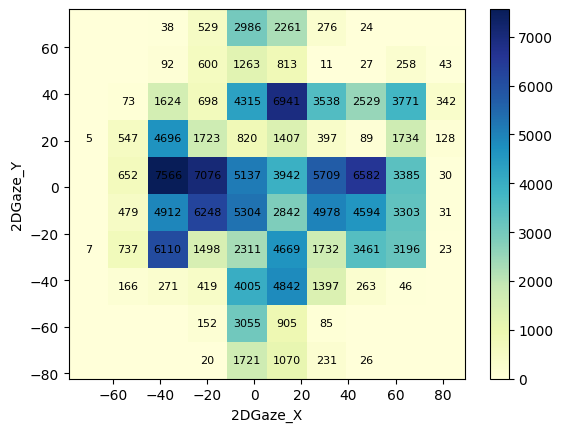

<Figure size 1600x1200 with 0 Axes>

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data['head_x'], total_label_data['head_y'], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))


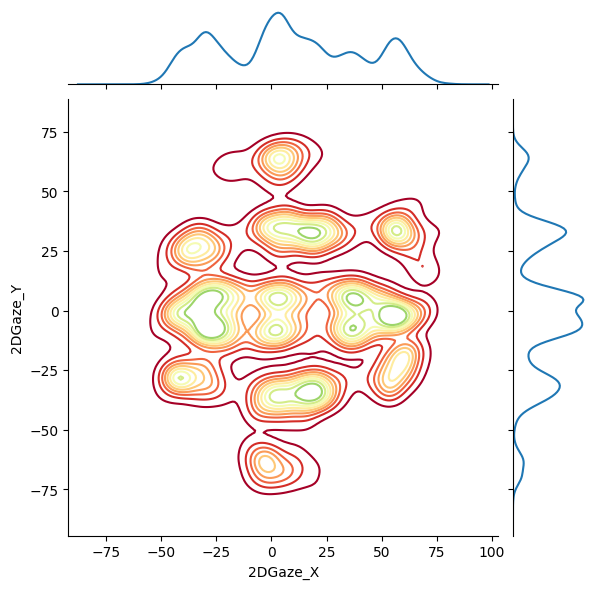

<Figure size 1600x1200 with 0 Axes>

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data, x='head_x', y='head_y', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

# face_gaze 저장

In [11]:
# h5 파일
import h5py
import os
data_list = []
# Replace 'your_file.h5' with the path to your HDF5 file
base_path = os.path.join("nsmount", "ETH_Xgaze", "xgaze_448", "train")

for file_name in os.listdir(base_path):
    file_path = os.path.join(base_path,file_name)
    with h5py.File(file_path, 'r') as f:
        data = f['face_gaze'][:,:]
    
        data_list.append(data)
        
        

In [8]:
data_list

10098